# BasicBayes Tutorial

## Intro

The module has 3 parts:  
  
1. **Parameters**: Parameters are objects which are used to specify probability distributions. Examples include the mean and standard deviation parameters of gaussian distributions. 
 
2. **Estimators**: Estimators are objects which take parameters, data, and a likelihood function, and find the values of the parameters that most probably explain the data under a given likelihood function.  

3. **Likelihood Functions**: In general, BasicBayes requires you to write your own likelihood function when using an Estimator. After all, there are way too many possibilities for how you might want to calculate your likelihoods, for this module to include them all. However, BasicBayes does include a library of commonly-used likelihood functions, including some classes for automating some particularly intensive likelihood calculations (ex. regressions).

The general process for conducting Bayesian Analysis within Basic Bayes involves creating your parameters, specifying their relevant hypotheses and priors, creating/choosing a likelihood function, and finally fitting an estimator to your data.

## Parameters  

The parameter class has the following API:

### Methods

* `Parameter(name, description)`: Creates and outputs a parameter object, with the given name and description.  

    * *`name`* (Optional): The name for the given parameter. It will be used to title the plot of this parameter's PDF. If not given, it defaults to "Parameter".  
    
    * *`description`* (Optional): The description for the given parameter. It will be used to caption the plot of this parameter's PDF. If not given, it defaults to "A Parameter".

* `bin(start, stop, num_steps, step, skip_first)`: Creates the hypotheses for the parameter. Use this to assign hypotheses for a numeric parameter. This also assigns a flat prior.
    * *`start`*: The lower bound on the parameter's value.  

    * *`stop`*: The upper bound on the parameter's value.

    * *`num_steps`* (Optional if `step` provided): The number of samples taken as hypotheses in the range \[start, stop\]  

    * *`step`* (Optional if `num_steps` provided): The step between samples taken as hypotheses in the range \[start, stop\] 

    * *`skip_first`* (Optional): Whether or not to skip the first hypothesis, useful if you want a range for the parameter hypotheses that is open at the lower bound (i.e. \(start, stop]). Defaults to `False`.
    
* `categorical_bin(categories)`: Assigns the hypotheses for parameters that are categorical, rather than numerical.

    * *`categories`*: The categorical values of the parameter, as a list. For example, this could be `["Heads", "Tails"]` if the parameter is describing the outcome of a coin flip.

* `plot_pdf()`: Plots the PDF for the parameter in a new window.

* `mode()`: Returns the mode of the PDF

* `CI(probability)`: Returns the confidence interval for the parameter's value as a tuple.

    * *`probability`* (Optional): The level of confidence for which the confidence interval is returned. Defaults to 0.95.

* `set_probabilities(function)`: Sets the pobabilities for each hypothesis. This can be used to set up priors.

    * *`function`*: The function to be used to assign a probability to each hypothesis.

* `Comparison Operators <, >, <=, >=, ==`: The comparison operators are overridden so that applying them to any 2 parameters returns a probability, rather than a boolean. For example, `1 < 2` returns `False`, but `parameter_1 < parameter_2` returns the probability that parameter_1 is less than parameter_2

### Attributes
* `bins`: An array that contains the hypothesis values.

* `probabilities`: The probability for the respective hypothesis in `bins`.

* `type`: A string describing whether the parameter is "Numeric" or "Categorical"

* `name`: The name of the parameter.

* `description`: The description of the parameter.


        

## Estimators

Estimator objects have the following API:

### Methods

* `Estimator(self, function, parameters, name, description)`: Creates and returns an estimator object.

    * *`function`*: The likelihood function used to fit the data.

    * *`parameters`*: The list of parameters whose values are used in the likelihood function, in the order that they need to be provided to the likelihood function. For example, if the likelihood function is `gaussian(x, mu, sigma)`, `parameters` should be the list `[mu_parameter, sigma_parameter]`.

   * *`name`* (Optional): The name for the given parameter. It will be used to title the plot of this parameter's PDF. If not given, it defaults to "Parameter".  
    
    * *`description`* (Optional): The description for the given parameter. It will be used to caption the plot of this parameter's PDF. If not given, it defaults to "A Parameter".

* `fit(data, mcmc)`: Uses Bayesian Inference to find the parameter values that best explain `data`. After calling this function, the parameters in the estimator will have their probability distributions modified based on data, and the mode of the joint posterior PDF is returned.

    * *`data`*: An iterable collection (ie. list, tuple, or array) of data observations.

    * *`mcmc`* (Optional): Whether or not to use Markov-Chain Monte-Carlo to approximate the posterior PDF. Defaults to `False`.

* `set_probabilities(function)`: Sets the probabilities of the estimator's internal joint PDF. Can be used to establish a prior.
    * *`function`*: A function of the different parameters that make up the estimator, giving the probability for each combination of parameters.

* `report(probability, rounded)`: Reports information on the estimator's joint PDF, as well as the marginalized PDFs of all parameters.
    * *`probability`* (Optional): The probability with which to report the confidence intervals. Defaults to 0.95.
    * *`rounded`* (Optional): The number of decimal places with which to report the modes and confidence intervals. Defaults to 3.

* `Calling the Estimator object like a function`: The estimator object itself can be called on a single datapoint, an iterable collection of data points, or a parameter to determine the probability of observing that data point, that series of data points, or any of the values in the parameter's hypothesis range, respectively.

### Attributes

* `function`: The likelihood function used by this estimator.

* `parameters`: The list of parameter objects that are used by the likelihood function.

* `name`: The name of the estimator.

* `description`: The description of the estimator.

* `probabilities`: The joint PDF used by the estimator

## Likelihood Function Library

(Will fill this in soon)

## Examples

### Fitting a Gaussian Distribution: Numeric Data, Numeric Parameters  

Let's say we have a series of data points, and we want to find the gaussian distribution that is the most likely to get us these observations, if we drew randomly from it. Suppose our data is the following list of observations:

<center>X = [-1, -2, -1, -3, 2, 1, 0, 1]</center>

To find the best fit, wwe can use the following workflow:

1. Create the mean and standard deviation parameters.

2. Create a likelihood function, which in this case is just the gaussian distribution and comes pre-loaded as part of BasicBayes.

3. Create the estimator, and fit it to the data.

4. Find the modes of the marginalized PDFs for the mean and stdev.

In [4]:
from BasicBayes import Parameter, Estimator

# Represent the data
X = [-1, -2, -1, -3, 2, 1, 0, 1]

# Create the parameters and "bin" them to make the hypotheses
mu = Parameter(name="Mu", description="Gaussian mean")
mu.bin(min(X), max(X), 100)
sigma = Parameter(name="Sigma", description="Gaussian standard deviation")
sigma.bin(0, max(X) - min(X), 100, skip_first=True)

# Get the likelihood function
from BasicBayes.LikelihoodFunctions import gaussian

# Create the estimator, and fit the data
gaussian_estimator = Estimator(function=gaussian, parameters=[mu, sigma])
gaussian_estimator.fit(X)

# Plot the PDFs, and get the mode
gaussian_estimator.report()

Mode of joint PDF is at:
     Mu = -0.37
     Sigma = 1.6
Marginalized PDFs:
     Mu = -0.37 with 95.0% CI (-1.84, 1.09)
     Sigma = 1.7 with 95.0% CI (0.05, 3.3)


In case we only cared about the mean of the optimal gaussian distribution, we might want to marginalize across the standard deviation. To get the marhinalized pdf, it's really simple. All we have to do is ask the mu parameter for its mode and 95% CI, rather than the estimator. This works because the `Estimator.fit()` function takes care of marginalization for us, by changing the PDFs of the parameters in the Estimator to their marginalized PDFs.

In [2]:
print(f"The mean of the population from which the data was drawn has mode {mu.mode()} with a 95% CI of {mu.CI(0.95)}.")

The mean of the population from which the data was drawn has mode -0.37 with a 95% CI of (-1.89, 1.09).


Now that we have the fitted estimator, we can even get the probability distribution for the next observation. To do this, we can set up a parameter to represent this next observation, and call the estimator on it. In this case, you can think of the estimator itself as a function which outputs the probabilities for any value

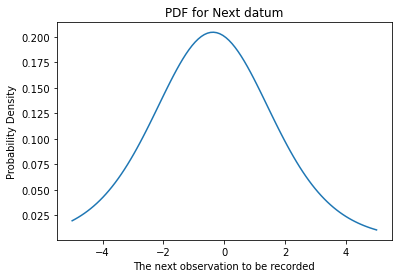

The most likely next observation is -0.35, with 95% confidence interval (-4.19, 3.48).


In [5]:
# Create the parameter for the next observation (don't forget to bin it)
next_datum = Parameter(name="Next datum", description="The next observation to be recorded").bin(-5, 5, 100)

# Call the estimator on it to transform it
next_datum = gaussian_estimator(next_datum)

# view the PDF
next_datum.plot_pdf()
print(f"The most likely next observation is {next_datum.mode()}, with 95% confidence interval {next_datum.CI(0.95)}.")

### Bias of a Coin: Categorical Data, Numeric Parameters

Suppose we have a coin, which we have reason to believe is rigged to land heads with a probability other than 50%. We observe the following sequence of flips:

<center>X = ["H", "H", "H", "H", "T", "T", "H", "T", "H"]</center>

To estimate the bias on the coin, as well as our uncertainty about it, we will follow the following workflow:

1. Set up a parameter representing the coin's bias

2. Create the likelihood function

3. Create the estimator, and fit the data

4. Check the PDF for the bias parameter

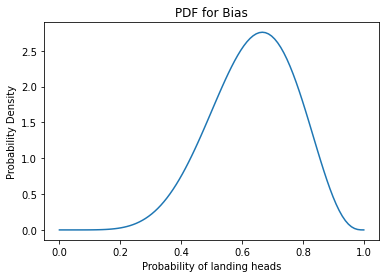

The bias of the coin is 0.67 with a 95% CI of (0.4, 1.0).


In [2]:
from BasicBayes import Parameter, Estimator

# Represent the data
X = ["H", "H", "H", "H", "T", "T", "H", "T", "H"]

# Set up a parameter representing the coin's bias
bias = Parameter("Bias", "Probability of landing heads").bin(0, 1, 100)

# Set up the likelihood function
def likelihood_of_flip(flip_outcome, bias):
    if flip_outcome == "H":
        return bias
    elif flip_outcome == "T":
        return 1 - bias

# Create the estimator, fit the data
bias_estimator = Estimator(function=likelihood_of_flip, parameters=[bias], name="Bias Estimator", description="Estimation for the bias of the coin")
bias_estimator.fit(X)

# Check the PDF for the bias parameter
bias.plot_pdf()
print(f"The bias of the coin is {bias.mode()} with a 95% CI of {bias.CI(0.95)}.")

NOTE: In this case, since the estimator is built using only 1 parameter, the "joint PDF" it stores internally is the exact same as the "marginalized PDF" stored in the bias parameter, and we can check either one to get the info we're after.

Again, we can also get the probability distribution for the outcome of the next flip:

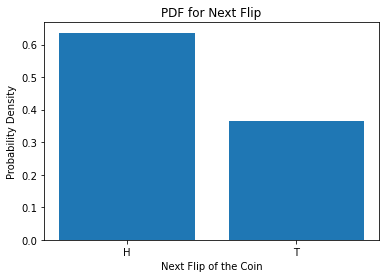

In [4]:
next_flip = Parameter("Next Flip", "Next Flip of the Coin").categorical_bin(["H", "T"])
next_flip = bias_estimator(next_flip)
next_flip.plot_pdf()

### Estimating Specificity and Sensitivity of a Test

Suppose we have 100 patients, and we're screening them for Senioritis using both a new test, and the gold standard test which is independent in terms of the physiological traits it screens. After screening them, we get the following confusion matrix:

|        | Positive Test   ||   Negative Test |
|:------:|:-------------:|---|:-------------:|
|**Actually Positive**| 41 || 9 |
|**Actually Negative**| 20|| 30 |

Although we can tell just from the raw data that our sensitivity = 41/(41+9) = 0.82, and our specificity = 30/(20+30) = 0.6, we may still want the posteriors to get an idea of our uncertainty. Since our study only used a sample of 100, we also want to account for the fact that the prevalence of Senioritis in our study is an estimate of the true prevalence in our population. If you didn't see right away that we needed to introduce a new parameter, you would have run into it (like I did) while writing your likelihood function. For that, we need to know P(Actually Positive) and P(Actually Negative). While we could use the proportion of positive and negative cases in our study as these values, a more accurate way would be to treat the prevalence as another unknown parameter, with its own PDF based on our data.

In [1]:
from BasicBayes import Parameter, Estimator
import BasicBayes.Utils as utils

# In this case, each data 
# point is a confusion matrix, and we just have one. 
# Represent the confusion matrix as a python array
import numpy as np
X = np.array([[41, 9],[20, 30]])

# Create the parameters
specificity = Parameter("Specificity", "Specificity for Senioritis Test").bin(0, 1, 100)
sensitivity = Parameter("Sensitivity", "Sensitivity for Senioritis Test").bin(0, 1, 100)
prevalence = Parameter("Prevalence", "Prevalence of Senioritis").bin(0, 1, 100)

# Create the likelihood function for the data, given a value for sensitivity and specificity
def confusion_matrix_likelihood(confusion_matrix, specificity, sensitivity, prevalence):
    # The probability of observing a TP, TN, FP, FN
    true_positives_probability = prevalence*sensitivity
    false_positives_probability = prevalence*(1-sensitivity)
    true_negatives_probability = (1-prevalence)*specificity
    false_negatives_probability = (1-prevalence)*(1-specificity)
    # The number of TP, TN, FP, FN
    n_TP = confusion_matrix[0, 0]
    n_FP = confusion_matrix[0, 1]
    n_TN = confusion_matrix[1, 1]
    n_FN = confusion_matrix[1, 0]
    # The likelihood for observing each number
    true_positives_likelihood = true_positives_probability**n_TP
    false_positives_likelihood = false_positives_probability**n_FP
    true_negatives_likelihood = true_negatives_probability**n_TN
    false_negatives_likelihood = false_negatives_probability**n_FN
    # The total likelihood for observing all 4 numbers
    return true_positives_likelihood*false_positives_likelihood*true_negatives_likelihood*false_negatives_likelihood

# Create the estimator
test_estimator = Estimator(confusion_matrix_likelihood, parameters=[specificity, sensitivity, prevalence])
test_estimator.fit(X)

# Check the PDFs
test_estimator.report()

Mode of joint PDF is at:
     Specificity = 0.6
     Sensitivity = 0.82
     Prevalence = 0.49
Marginalized PDFs:
     Specificity = 0.6 with 95.0% CI (0.47, 0.73)
     Sensitivity = 0.82 with 95.0% CI (0.72, 0.94)
     Prevalence = 0.51 with 95.0% CI (0.41, 0.6)


### Linear Regression

Now lets step it up a notch, and see how we can use BasicBayes to perform a regression. Suppose we have the following data:

<center> X = [0, 1, 2, 3] </center>
<center> Y = [4, 2, 11, 9] </center>

We want to fit a linear trendline to see how Y varies with X. We can assume that the Y values are sampled from gaussian distributions whose means vary based on X. For a linear regression, we'll assume that the mean is a linear function of X, with some slope and y-intercept. We can use BasicBayes to infer what the slope and y-intercept are.

Mode of joint PDF is at:
     Standard Deviation = 2.45
     Slope = 2.37
     Y-Intercept = 2.93
Marginalized PDFs:
     Standard Deviation = 3.1 with 95.0% CI (0.05, 4.75)
     Slope = 2.32 with 95.0% CI (0.3, 4.44)
     Y-Intercept = 2.93 with 95.0% CI (0.0, 6.97)


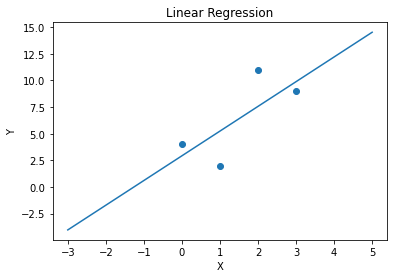

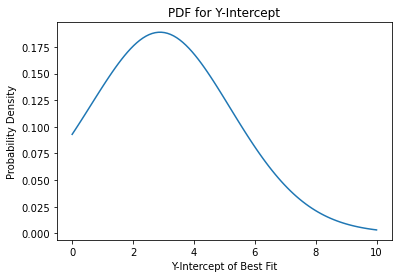

In [1]:
from BasicBayes import Parameter, Estimator

# Represent the data
X = [(0, 4), (1, 2), (2, 11), (3, 9)]

# Create the parameters for the slope and y-intercept
slope = Parameter("Slope", "Slope of Line of Best Fit").bin(0, 5, 100)
b = Parameter("Y-Intercept", "Y-Intercept of Best Fit").bin(0, 10, 100)
sigma = Parameter("Standard Deviation", "Standard Deviation for Best Fit").bin(0, 5, 100, skip_first=True)

# Create/import the likelihood function
from BasicBayes.LikelihoodFunctions import gaussian_linear_regression

# Set up the estimator
model = Estimator(function=gaussian_linear_regression, parameters=[sigma, slope, b])
model.fit(X)

# Check the outcomes
model.report()

# Plot it for fun
import matplotlib.pyplot as plt
import numpy as np
X, Y = zip(*X)
plt.scatter(X, Y)
plt.plot(np.linspace(-3, 5, 100), np.linspace(-3, 5, 100) * slope.mode() + b.mode() )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.show()

b.plot_pdf()

### Ontario COVID-19 Data

We can also use linear regression and Bayesian Inference to find the probability that the decreasing number of daily new COVID cases in Ontario is actually indicative of a lowering infection rate. Once again, we'll do a linear regression on the number of new cases each day. Unlike last time though, since the number of new cases is a count, we'll model the number of new cases as being a sample from a poisson distribution, whose poisson parameter is changing with each day. (NOTE: The data is the number of new confirmed cases over the last 10 days, from the Johns Hopkins Whiting School of Engineering at https://github.com/CSSEGISandData).

This time, instead of using the built-in regression likelihood functions like we did in the last example, we'll use the `Regression` class from the `LikelihoodFunctions` module. It's a little more complex to use, but it gives you a lot of flexibility to pick both your regression function (i.e. exponential, linear, etc) and likelihood function separately.

Mode of joint PDF is at:
     Parameter = 400.0
     Slope = 24.44
     Y Intercept = 3111.11
Marginalized PDFs:
     Parameter = 400.0 with 95.0% CI (100.0, 600.0)
     Slope = 24.44 with 95.0% CI (-10.0, 75.56)
     Y Intercept = 3111.11 with 95.0% CI (2666.67, 3616.16)

There is a 0.8961743354648891 probability that the infection rate is increasing.


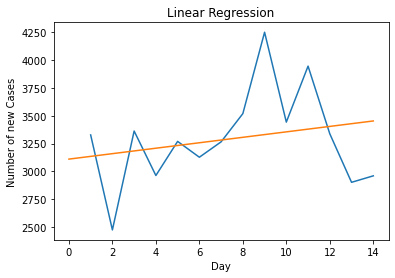

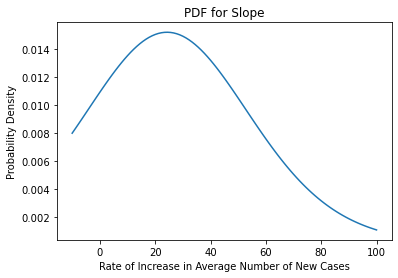

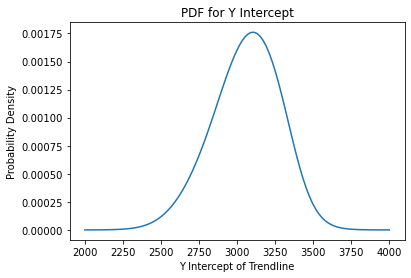

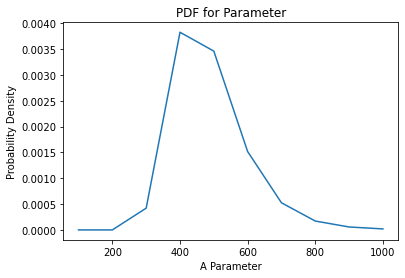

In [14]:
# Lets get the data
import csv
import requests
total_cases = [0,]
N_days = 14
url = 'https://data.ontario.ca/datastore/dump/ed270bb8-340b-41f9-a7c6-e8ef587e6d11?bom=True'
with requests.get(url, stream=True) as r:
    lines = (line.decode('utf-8-sig') for line in r.iter_lines())
    for row in csv.DictReader(lines):
        if row['Total Cases'] != "":
            total_cases.append(int(row["Total Cases"]))
last_10_days = list([total_cases[i] - total_cases[i-1] for i in range(1, len(total_cases))])[-N_days:]
X = list(zip(list( [i+1 for i in range(N_days)] ), last_10_days))

# Now lets do the inference
from BasicBayes import Parameter, Estimator
from BasicBayes.LikelihoodFunctions import Regression, poisson, gaussian_linear_regression

slope = Parameter("Slope", "Rate of Increase in Average Number of New Cases").bin(-10, 100, 100)
y_intercept = Parameter("Y Intercept", "Y Intercept of Trendline").bin(2000, 4000, 100)
sig = Parameter().bin(0, 1000, 100, skip_first=True)

likelihood_function = Regression(regression_function=line, parameters=[slope, y_intercept, sig], likelihood_function=gaussian)

model = Estimator(function=gaussian_linear_regression, parameters=[sig, slope, y_intercept])
model.fit(X, mcmc=False)

model.report()
print(f"\nThere is a {slope > 0} probability that the infection rate is increasing.")

# Plot it for fun
import matplotlib.pyplot as plt
import numpy as np
X, Y = zip(*X)
plt.plot(X, Y)
plt.plot(np.linspace(0, N_days, 100), np.linspace(0, N_days, 100) * slope.mode() + y_intercept.mode() )
plt.xlabel("Day")
plt.ylabel("Number of new Cases")
plt.title("Linear Regression")
plt.show()

slope.plot_pdf()
y_intercept.plot_pdf()
sig.plot_pdf()

### Hierarchical Model

Mode of joint PDF is at:
     Slope = 5.0
     Y Intercept = 117.42
Marginalized PDFs:
     Slope = 5.0 with 95.0% CI (4.05, 5.0)
     Y Intercept = 118.94 with 95.0% CI (111.36, 126.52)

There is a 0.9999999987020707 probability that the infection rate is increasing.


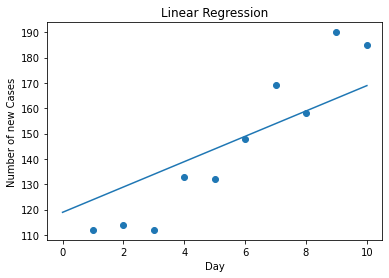

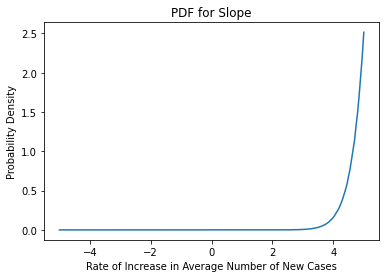

In [1]:
# Lets get the data
import csv
import requests
total_cases = [0,]
url = 'https://data.ontario.ca/datastore/dump/ed270bb8-340b-41f9-a7c6-e8ef587e6d11?bom=True'
with requests.get(url, stream=True) as r:
    lines = (line.decode('utf-8-sig') for line in r.iter_lines())
    for row in csv.DictReader(lines):
        if row['Total Cases'] != "":
            total_cases.append(int(row["Total Cases"]))
last_10_days = list([total_cases[i] - total_cases[i-1] for i in range(1, len(total_cases))])[-10:]
X = list(zip(list( [i+1 for i in range(10)] ), last_10_days))

# Now lets do the inference
from BasicBayes import Parameter, Estimator
from BasicBayes.LikelihoodFunctions import Regression, poisson

slope = Parameter("Slope", "Rate of Increase in Average Number of New Cases").bin(-5, 5, 200)
y_intercept = Parameter("Y Intercept", "Y Intercept of Trendline").bin(75, 150, 100)

line = lambda x, slope, y_intercept: x * slope + y_intercept
likelihood_function = Regression(regression_function=line, parameters=[slope, y_intercept], likelihood_function=poisson)

model = Estimator(function=likelihood_function, parameters=[slope, y_intercept])
model.fit(X, mcmc=False)

model.report()
print(f"\nThere is a {slope > 0} probability that the infection rate is increasing.")

# Plot it for fun
import matplotlib.pyplot as plt
import numpy as np
X, Y = zip(*X)
plt.scatter(X, Y)
plt.plot(np.linspace(0, 10, 100), np.linspace(0, 10, 100) * slope.mode() + y_intercept.mode() )
plt.xlabel("Day")
plt.ylabel("Number of new Cases")
plt.title("Linear Regression")
plt.show()

slope.plot_pdf()

### Something Smells Funny: Does Australia ACTUALLY Have a Higher Rate of Political Pants-Shitting?

In [ ]:
from BasicBayes import Parameter, Estimator
from BasicBayes.LikelihoodFunctions import poisson


poisson_parameters = {}
estimators = {}
for country in ("USA", "Australia"):
    poisson_parameters[country] = Parameter(name=country, description=f"Probability of {country}'s Head of State Shitting Themselves").bin(0, 5, 100)
    estimators[country] = Estimator(likelihood_function=poisson)
    poisson_parameters[country].set_probabilities(lambda x: poisson(x, 0))
    
